# Importing Libraries
___________________________________________________________________________________________________________________________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

##  Loading the Data and Initial Exploration
________________________________________________________________________________________________________________________

In [3]:
# Loading the dataset
df = pd.read_csv('Amazon Sale Report.csv')

# Setting Pandas option to display all columns:
pd.set_option('display.max_columns', None)     

In [4]:
# Understanding dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
# Modifying column names to make them consistent and more suitable for analysis and glancing through the data.
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
df.head(5)

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,size,asin,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


## Data Cleaning
___________________________________________________________________________________________________________________________

In [6]:
# Categorizing its columns into three lists based on data types:
# integer_columns, float_columns, and object_columns.

integer_cols = list(df.select_dtypes(include=['int64']).columns)
float_cols = list(df.select_dtypes(include=['float64']).columns)
object_cols = list(df.select_dtypes(include=['object']).columns)


print(f"Integer_columns:\n{integer_cols}\n\nFloat_columns:\n{float_cols}\n\nObject_columns:\n{object_cols}")

Integer_columns:
['index', 'qty']

Float_columns:
['amount', 'ship_postal_code']

Object_columns:
['order_id', 'date', 'status', 'fulfilment', 'sales_channel_', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'currency', 'ship_city', 'ship_state', 'ship_country', 'promotion_ids', 'fulfilled_by', 'unnamed:_22']


In [7]:
# counting the unique values for each columns with dtype='object', returning the results in a new DataFrame.
unique_object_counts = []
for i in object_cols:
    unique_object_counts.append([i, df[i].nunique()])
    
unique_object_counts = pd.DataFrame(unique_object_counts, columns=['Columns', 'Unique Values'])
unique_object_counts

,Columns,Unique Values
0,order_id,120378
1,date,91
2,status,13
3,fulfilment,2
4,sales_channel_,2
5,ship_service_level,2
6,style,1377
7,sku,7195
8,category,9
9,size,11


In [8]:
# Filtering suitable categorical columns in a list.
cat_cols = ['status', 'fulfilment', 'sales_channel_', 'ship_service_level', 'category', 'size', 
            'courier_status', 'currency', 'ship_state', 'ship_country', 'fulfilled_by', 'unnamed:_22']

In [9]:
# Summarizing categorical column by displaying the count of unique values in a tabular format.
for col in cat_cols:
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = ['Category', 'Count']

    print(f'\n{col.upper()}:\n')
    print(value_counts.to_string(index=False))
    print('\n' + '__' * 30 + '\n')


STATUS:

                      Category  Count
                       Shipped  77804
  Shipped - Delivered to Buyer  28769
                     Cancelled  18332
  Shipped - Returned to Seller   1953
           Shipped - Picked Up    973
                       Pending    658
 Pending - Waiting for Pick Up    281
 Shipped - Returning to Seller    145
    Shipped - Out for Delivery     35
   Shipped - Rejected by Buyer     11
                      Shipping      8
     Shipped - Lost in Transit      5
             Shipped - Damaged      1

____________________________________________________________


FULFILMENT:

 Category  Count
   Amazon  89698
 Merchant  39277

____________________________________________________________


SALES_CHANNEL_:

   Category   Count
  Amazon.in  128851
 Non-Amazon     124

____________________________________________________________


SHIP_SERVICE_LEVEL:

  Category  Count
 Expedited  88615
  Standard  40360

_________________________________________________

In [10]:
delivery_status = {'Cancelled'                       :'Cancelled',
                     'Shipped - Delivered to Buyer'  :'Delivered',
                     'Shipped'                       :'In_transit',
                     'Shipped - Returned to Seller'  :'Returned',
                     'Shipped - Rejected by Buyer'   :'Rejected',
                     'Shipped - Lost in Transit'     :'Lost_in_transit',
                     'Shipped - Out for Delivery'    :'Out_for_delivery',
                     'Shipped - Returning to Seller' :'Returning_to_seller',
                     'Shipped - Picked Up'           :'Order_picked_up',
                     'Pending'                       :'Order_initiated',
                     'Pending - Waiting for Pick Up' :'Waiting_for_pick_up',
                     'Shipped - Damaged'             :'Damaged',
                     'Shipping'                      :'in_local_hub'
}

# updating the values in 'status' column with new values according to the mapping in the dictionary.
df['status'] = df['status'].replace(delivery_status)

# extracting count of unique values in updated 'status' column.
df['status'].value_counts()

In_transit             77804
Delivered              28769
Cancelled              18332
Returned                1953
Order_picked_up          973
Order_initiated          658
Waiting_for_pick_up      281
Returning_to_seller      145
Out_for_delivery          35
Rejected                  11
in_local_hub               8
Lost_in_transit            5
Damaged                    1
Name: status, dtype: int64

In [11]:
# Displaying unique values in the 'ship_state' column
df['ship_state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

>  __'ship_state' column in dataset has lot of dupicate values due to uneven character casing__

In [12]:
# Updating column values such that text is capitalized to drop duplicates. 
df['ship_state'] = df['ship_state'].str.title()

# extracting count of unique values in updated 'ship_state' column.
df['ship_state'].value_counts()

Maharashtra               22260
Karnataka                 17326
Tamil Nadu                11483
Telangana                 11330
Uttar Pradesh             10638
Delhi                      6967
Kerala                     6585
West Bengal                5963
Andhra Pradesh             5430
Gujarat                    4489
Haryana                    4415
Rajasthan                  2711
Madhya Pradesh             2529
Odisha                     2136
Bihar                      2114
Punjab                     1917
Assam                      1663
Uttarakhand                1553
Jharkhand                  1456
Goa                        1137
Chhattisgarh                909
Himachal Pradesh            788
Jammu & Kashmir             702
Puducherry                  350
Chandigarh                  333
Manipur                     316
Andaman & Nicobar           257
Meghalaya                   207
Sikkim                      205
Nagaland                    185
Tripura                     151
Arunacha

In [13]:
#  Filtering unidentified state with columns 'ship_city' and 'ship_postal_code' 
df[df['ship_state']=='Apo'][['ship_city', 'ship_postal_code']]

,ship_city,ship_postal_code
45187,APO,959121.0


> __with reference to postal code 'APO' isn't any state but it is an abbrevaiation for army postal office__

In [14]:
# Filtering unidentified state with columns 'ship_city' and 'ship_postal_code'
df[df['ship_state']=='Ar'][['ship_city', 'ship_postal_code']]

,ship_city,ship_postal_code
51420,ITANAGAR,791113.0


> __with reference to postal code and city 'Ar' is Arunachal Pradesh.__

In [15]:
# Replacing state abbreviations or incorrectly spelled state names with their full names in the 'ship_state' column.
state_reorder = {'Apo': "Army_postal_Service",
                 'Ar': "Arunachal Pradesh",
                 'Punjab/Mohali/Zirakpur': "Punjab",
                 'Pb': "Punjab",
                 'Pondicherry': "Puducherry",
                 'Rj': "Rajasthan",
                 'Rajsthan': "Rajasthan",
                 'Rajshthan': "Rajasthan",
                 'Nl': "Nagaland",
                 'Orissa': "Odisha",
                 'New Delhi': "Delhi"
}


df['ship_state'] = df['ship_state'].replace(state_reorder)

# Counting unique values for 'ship_state' column.
print(df['ship_state'].nunique(), '\n\n')

# Cross verifying whether all the states in 'ship_state' column are correctly labeled or not.
print(df['ship_state'].unique())

37 


['Maharashtra' 'Karnataka' 'Puducherry' 'Tamil Nadu' 'Uttar Pradesh'
 'Chandigarh' 'Telangana' 'Andhra Pradesh' 'Rajasthan' 'Delhi' 'Haryana'
 'Assam' 'Jharkhand' 'Chhattisgarh' 'Odisha' 'Kerala' 'Madhya Pradesh'
 'West Bengal' 'Nagaland' 'Gujarat' 'Uttarakhand' 'Bihar'
 'Jammu & Kashmir' 'Punjab' 'Himachal Pradesh' 'Arunachal Pradesh'
 'Manipur' 'Goa' 'Meghalaya' 'Tripura' 'Ladakh' 'Dadra And Nagar' 'Sikkim'
 nan 'Andaman & Nicobar ' 'Mizoram' 'Lakshadweep' 'Army_postal_Service']


In [16]:
# Updating column values such that text is capitalized to drop duplicates. 
df['ship_city'] = df['ship_city'].str.title()


print('Unique Cities: ', df['ship_city'].unique(), '\n\n')
print('Number of Unique Cities: ', df['ship_city'].nunique())

Unique Cities:  ['Mumbai' 'Bengaluru' 'Navi Mumbai' ... 'Cherukunnu (P.O)'
 'Gulabpura, Distt Bhilwara' 'Prayagraj (Allahabad)'] 


Number of Unique Cities:  7297


> __Considerably dropped duplicated cities, still unique number of cities is too large to do deep down cleaning as similar to 'ship_state column'.__

In [17]:
# Extracting string part of 'style' column to obtain different categorical code of styles.
df['style_code'] = df['style'].str.extract('([A-Za-z]+)')

# Counting unique style codes extracted.
df['style_code'].value_counts()

JNE     54178
SET     34570
J       31116
MEN      4044
NW       2317
PJNE     1492
BL        451
BTM       316
PSET      190
SAR       141
AN         88
CH         36
PJ         33
DPT         3
Name: style_code, dtype: int64

In [18]:
# Creating new column 'style_category' as subcategory of 'category' column.
df['style_category'] = df['category'] + "_" + df['style_code']

In [19]:
# Group the DataFrame by 'category' and 'style_code', then count the occurrences of each one.
df.groupby(['category', 'style_code']).count()['index']

category       style_code
Blouse         BL              451
               J               475
Bottom         AN               88
               BTM             316
               CH               36
Dupatta        DPT               3
Ethnic Dress   J              1104
               JNE              55
Saree          JNE              23
               SAR             141
Set            J             13208
               NW             2317
               PSET            190
               SET           34569
Top            J              6589
               JNE            4033
Western Dress  J              7253
               JNE            8247
kurta          J              2487
               JNE           41820
               MEN            4044
               PJ               33
               PJNE           1492
               SET               1
Name: index, dtype: int64

In [20]:
# Creating new column 'promotions' which contains cleaned values from 'promotion_ids' column
# to check different promotions applied to the item.
df['promotions'] = df['promotion_ids'].str.split().str[:4].str.join(' ')
df['promotions'].unique()

array([nan, 'Amazon PLCC Free-Financing Universal',
       'IN Core Free Shipping', 'Duplicated A12RHGVGRWOT3S 1560498941486',
       'Duplicated AYTJSBA8ZOP16 1567159860988',
       'VPC-44571-41445527 Coupon', 'VPC-44571-41445498 Coupon',
       'VPC-44571-41445561 Coupon', 'VPC-44571-41445473 Coupon',
       'VPC-44571-38707197 Coupon', 'VPC-44571-38708638 Coupon',
       'VPC-44571-38707597 Coupon', 'VPC-44571-44201770 Coupon',
       'VPC-44571-44201687 Coupon', 'VPC-44571-44201853 Coupon'],
      dtype=object)

> __There are 10 different types of VPC coupons in addition to 4 different types of promotion codes__.

In [21]:
# Clubbing 10 different VPC coupons as one single type for better categorization.
df['promotions'] = df['promotions'].str.replace(r'^VPC-\d{5}-\d+ Coupon$', 'VPC-44571 Coupon')
df['promotions'].value_counts()

IN Core Free Shipping                      46198
Amazon PLCC Free-Financing Universal       32348
Duplicated A12RHGVGRWOT3S 1560498941486      489
Duplicated AYTJSBA8ZOP16 1567159860988       433
VPC-44571 Coupon                             354
Name: promotions, dtype: int64

In [22]:
# Filtering 'fulfilled_by' column with 'fulfilment' column to check the relation between them.
df[df['fulfilled_by']=='Easy Ship']['fulfilment'].value_counts()

Merchant    39277
Name: fulfilment, dtype: int64

In [23]:
# converting 'ship_postal_code' column to dtype='string'.
df['ship_postal_code'] = df['ship_postal_code'].astype('string').str.split('.').str[0]

In [24]:
# converting 'date' column to dtype='datetime'.
df['date'] = pd.to_datetime(df['date'])

In [25]:
# Filtering unusable columns.
cols_to_drop = ['unnamed:_22', 'ship_country', 'currency', 'fulfilled_by', 'index', 'order_id', 'sku', 'asin', 'promotion_ids', 'sales_channel_', 'style']

In [26]:
# Dropping unnecesarry columns
df.drop(columns = cols_to_drop, inplace=True)
df

,date,status,fulfilment,ship_service_level,category,size,courier_status,qty,amount,ship_city,ship_state,ship_postal_code,b2b,style_code,style_category,promotions
0,2022-04-30,Cancelled,Merchant,Standard,Set,S,NaN,0,647.62,Mumbai,Maharashtra,400081,False,SET,Set_SET,NaN
1,2022-04-30,Delivered,Merchant,Standard,kurta,3XL,Shipped,1,406.00,Bengaluru,Karnataka,560085,False,JNE,kurta_JNE,Amazon PLCC Free-Financing Universal
2,2022-04-30,In_transit,Amazon,Expedited,kurta,XL,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210,True,JNE,kurta_JNE,IN Core Free Shipping
3,2022-04-30,Cancelled,Merchant,Standard,Western Dress,L,NaN,0,753.33,Puducherry,Puducherry,605008,False,J,Western Dress_J,NaN
4,2022-04-30,In_transit,Amazon,Expedited,Top,3XL,Shipped,1,574.00,Chennai,Tamil Nadu,600073,False,JNE,Top_JNE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,In_transit,Amazon,Expedited,kurta,XL,Shipped,1,517.00,Hyderabad,Telangana,500013,False,JNE,kurta_JNE,NaN
128971,2022-05-31,In_transit,Amazon,Expedited,Set,M,Shipped,1,999.00,Gurugram,Haryana,122004,False,SET,Set_SET,IN Core Free Shipping
128972,2022-05-31,In_transit,Amazon,Expedited,Western Dress,XXL,Shipped,1,690.00,Hyderabad,Telangana,500049,False,J,Western Dress_J,NaN
128973,2022-05-31,In_transit,Amazon,Expedited,Set,XS,Shipped,1,1199.00,Halol,Gujarat,389350,False,J,Set_J,IN Core Free Shipping


In [27]:
# Filtering columns with dtype='object'.
object_columns = list(df.select_dtypes(include=['object']).columns)

# counting the unique values for each columns within filtered columns, returning the results in a new DataFrame.
unique_object_counts = []
for i in object_columns:
    unique_object_counts.append([i, df[i].nunique()])
    
unique_object_counts = pd.DataFrame(unique_object_counts, columns=['Columns', 'Unique Values'])
unique_object_counts

,Columns,Unique Values
0,status,13
1,fulfilment,2
2,ship_service_level,2
3,category,9
4,size,11
5,courier_status,3
6,ship_city,7297
7,ship_state,37
8,ship_postal_code,9459
9,style_code,14


## Dealing with missing values.
___________________________________________________________________________________________________________________________

In [28]:
# In column 'no_promotions' replacing values where promotion code aren't mentioned with no_promotions.
df['promotions'] = df['promotions'].fillna('no_promotions')

In [29]:
# Filter rows where 'courier_status' is NaN and counting unique values in the 'status' column.
df[pd.isna(df['courier_status'])]['status'].value_counts()

Cancelled    6861
Delivered       8
Returned        3
Name: status, dtype: int64

In [30]:
def replace_courier_status(data):
    """
    Replace 'courier_status' based on conditions.

    This function takes a row of data as input and replaces the 'courier_status' based on specific conditions:
    - If 'courier_status' is NaN and 'status' is 'Cancelled', it returns 'Cancelled'.
    - If 'courier_status' is NaN and 'status' is 'Delivered' or 'Returned', it returns 'Shipped'.
    - Otherwise, it returns the original 'courier_status'.
    """
    
    if pd.isna(data['courier_status']) and data['status'] == 'Cancelled':
        return 'Cancelled'
    elif pd.isna(data['courier_status']) and data['status'] in ['Delivered', 'Returned']:
        return 'Shipped'
    else:
        return data['courier_status']

# Applying the 'replace_courier_status' function to update 'courier_status'
df['courier_status'] = df.apply(replace_courier_status, axis=1)

In [31]:
# Counting unique values in 'courier_status' column.
df['courier_status'].value_counts()

Shipped      109498
Cancelled     12796
Unshipped      6681
Name: courier_status, dtype: int64

In [32]:
# Viewing percentage of null values in each columns.
((df.isnull().sum()) / len(df)) * 100

date                  0.000000
status                0.000000
fulfilment            0.000000
ship_service_level    0.000000
category              0.000000
size                  0.000000
courier_status        0.000000
qty                   0.000000
amount                6.043807
ship_city             0.025586
ship_state            0.025586
ship_postal_code      0.025586
b2b                   0.000000
style_code            0.000000
style_category        0.000000
promotions            0.000000
dtype: float64

In [33]:
# Dropping rows with missing values.
df = df.dropna()
df

,date,status,fulfilment,ship_service_level,category,size,courier_status,qty,amount,ship_city,ship_state,ship_postal_code,b2b,style_code,style_category,promotions
0,2022-04-30,Cancelled,Merchant,Standard,Set,S,Cancelled,0,647.62,Mumbai,Maharashtra,400081,False,SET,Set_SET,no_promotions
1,2022-04-30,Delivered,Merchant,Standard,kurta,3XL,Shipped,1,406.00,Bengaluru,Karnataka,560085,False,JNE,kurta_JNE,Amazon PLCC Free-Financing Universal
2,2022-04-30,In_transit,Amazon,Expedited,kurta,XL,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210,True,JNE,kurta_JNE,IN Core Free Shipping
3,2022-04-30,Cancelled,Merchant,Standard,Western Dress,L,Cancelled,0,753.33,Puducherry,Puducherry,605008,False,J,Western Dress_J,no_promotions
4,2022-04-30,In_transit,Amazon,Expedited,Top,3XL,Shipped,1,574.00,Chennai,Tamil Nadu,600073,False,JNE,Top_JNE,no_promotions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,In_transit,Amazon,Expedited,kurta,XL,Shipped,1,517.00,Hyderabad,Telangana,500013,False,JNE,kurta_JNE,no_promotions
128971,2022-05-31,In_transit,Amazon,Expedited,Set,M,Shipped,1,999.00,Gurugram,Haryana,122004,False,SET,Set_SET,IN Core Free Shipping
128972,2022-05-31,In_transit,Amazon,Expedited,Western Dress,XXL,Shipped,1,690.00,Hyderabad,Telangana,500049,False,J,Western Dress_J,no_promotions
128973,2022-05-31,In_transit,Amazon,Expedited,Set,XS,Shipped,1,1199.00,Halol,Gujarat,389350,False,J,Set_J,IN Core Free Shipping


In [34]:
# Understanding bulk-ordering behaviour.
df['qty'].value_counts()

1    115637
0      5133
2       337
3        31
4         8
5         2
8         1
Name: qty, dtype: int64

In [35]:
# Filtering 'status' column when qty is 0.
df[df['qty'] == 0]['status'].value_counts()

Cancelled    5133
Name: status, dtype: int64

> __Clearly orders that are cancelled, are flagged as 0 in quantity.__

In [36]:
def update_quantity(data):
    """
    Updates 'qty' based on status and conditions.
    This function takes a row of data as input and updates the 'qty' column based on specific conditions
    """
    
    if (data['status'] == 'Cancelled') and (data['qty'] == 0):
        return 0
    elif data['status'] in ['Cancelled', 'Returned', 'Returning_to_seller', 'Rejected', 'Lost_in_transit', 'Damaged']:
        return data['qty'] * -1
    else:
        return data['qty']

    
# Applying the 'update_quantity' function to update 'qty' column.
df['qty'] = df.apply(update_quantity, axis=1)

# Count and print the unique values in the 'qty' column.
print(df['qty'].value_counts())

 1    107943
-1      7694
 0      5133
 2       301
-2        36
 3        25
 4         7
-3         6
 5         2
-4         1
 8         1
Name: qty, dtype: int64


In [37]:
# Adding a new column 'total_price' by multiplying 'qty' column and 'amount' column.
df['total_price'] = df.apply(lambda x: x['qty'] * x['amount'], axis = 1)

## Exploring Cleaned Dataset 
___________________________________________________________________________________________________________________________

In [38]:
df.reset_index(inplace=True, drop=True)
df

,date,status,fulfilment,ship_service_level,category,size,courier_status,qty,amount,ship_city,ship_state,ship_postal_code,b2b,style_code,style_category,promotions,total_price
0,2022-04-30,Cancelled,Merchant,Standard,Set,S,Cancelled,0,647.62,Mumbai,Maharashtra,400081,False,SET,Set_SET,no_promotions,0.0
1,2022-04-30,Delivered,Merchant,Standard,kurta,3XL,Shipped,1,406.00,Bengaluru,Karnataka,560085,False,JNE,kurta_JNE,Amazon PLCC Free-Financing Universal,406.0
2,2022-04-30,In_transit,Amazon,Expedited,kurta,XL,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210,True,JNE,kurta_JNE,IN Core Free Shipping,329.0
3,2022-04-30,Cancelled,Merchant,Standard,Western Dress,L,Cancelled,0,753.33,Puducherry,Puducherry,605008,False,J,Western Dress_J,no_promotions,0.0
4,2022-04-30,In_transit,Amazon,Expedited,Top,3XL,Shipped,1,574.00,Chennai,Tamil Nadu,600073,False,JNE,Top_JNE,no_promotions,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121144,2022-05-31,In_transit,Amazon,Expedited,kurta,XL,Shipped,1,517.00,Hyderabad,Telangana,500013,False,JNE,kurta_JNE,no_promotions,517.0
121145,2022-05-31,In_transit,Amazon,Expedited,Set,M,Shipped,1,999.00,Gurugram,Haryana,122004,False,SET,Set_SET,IN Core Free Shipping,999.0
121146,2022-05-31,In_transit,Amazon,Expedited,Western Dress,XXL,Shipped,1,690.00,Hyderabad,Telangana,500049,False,J,Western Dress_J,no_promotions,690.0
121147,2022-05-31,In_transit,Amazon,Expedited,Set,XS,Shipped,1,1199.00,Halol,Gujarat,389350,False,J,Set_J,IN Core Free Shipping,1199.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121149 entries, 0 to 121148
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                121149 non-null  datetime64[ns]
 1   status              121149 non-null  object        
 2   fulfilment          121149 non-null  object        
 3   ship_service_level  121149 non-null  object        
 4   category            121149 non-null  object        
 5   size                121149 non-null  object        
 6   courier_status      121149 non-null  object        
 7   qty                 121149 non-null  int64         
 8   amount              121149 non-null  float64       
 9   ship_city           121149 non-null  object        
 10  ship_state          121149 non-null  object        
 11  ship_postal_code    121149 non-null  object        
 12  b2b                 121149 non-null  bool          
 13  style_code          121149 no

In [40]:
df.describe()

,qty,amount,total_price
count,121149.000000,121149.000000,121149.000000
mean,0.832677,648.573305,541.873800
std,0.525909,281.222115,485.315393
min,-4.000000,0.000000,-11184.000000
25%,1.000000,449.000000,399.000000
50%,1.000000,605.000000,563.000000
75%,1.000000,788.000000,771.000000
max,8.000000,5584.000000,44672.000000


In [41]:
df['date'].dt.year.unique()

array([2022], dtype=int64)

In [42]:
df['date'].dt.month.unique()

array([4, 3, 5, 6], dtype=int64)

## Data Visualization
___________________________________________________________________________________________________________________________

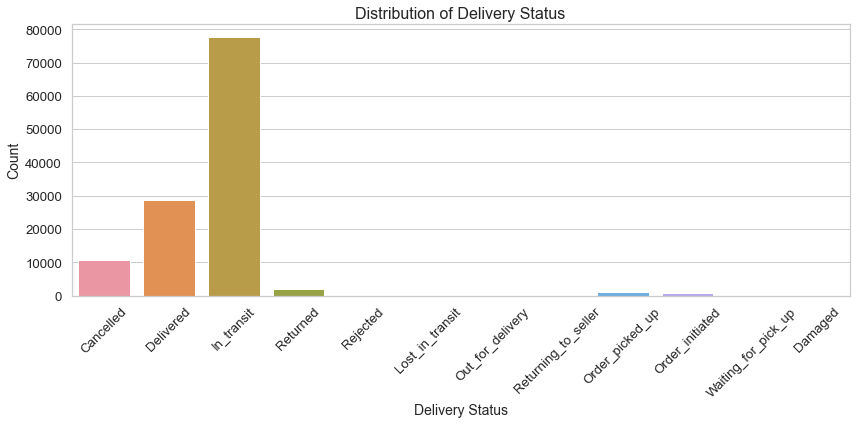

In [43]:
# plotting order counts based on their delivery status
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

sns.countplot(x='status', data=df)

plt.xlabel("Delivery Status", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Delivery Status", fontsize=16)
plt.tight_layout()
plt.show()

>* __Most of the orders are in-transit or are delivered.__
>* __Also it appears that less than 9% of orders are cancelled.__
>* __Less than 2% of are returned or in the delivery process of returning.__

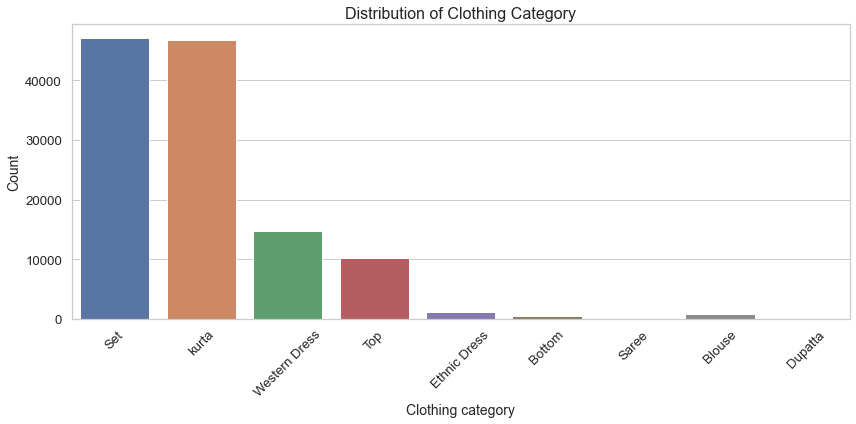

In [44]:
# plotting order counts based on the clothing category
plt.figure(figsize=(12, 6))

sns.countplot(x='category', data=df)

plt.xlabel("Clothing category", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Clothing Category", fontsize=16)
plt.tight_layout()
plt.show()

>* __Set and Kurta are most demanded in clothing category, over 38% people likely ordering them each going neck to neck with each other.__
>* __Saree and Dupatta are least ordered items.__
>* __Quite a few people over 12% likes Western Dress.__

In [45]:
# Calculating the percentage of canceled orders by dressing category.
(df[df['status']== 'Cancelled']['category'].value_counts()) / (df['category'].value_counts()) * 100

Blouse           8.513053
Bottom           9.761905
Dupatta               NaN
Ethnic Dress     7.319305
Saree            7.741935
Set              8.928154
Top              8.157040
Western Dress    9.079780
kurta            8.972163
Name: category, dtype: float64

> __None of the dress category seems to significantly leads to cancellation of orders.__

In [46]:
# Calculating the percentage of canceled orders by dress sizes.
((df[df['status']== 'Cancelled']['size'].value_counts()) / (df['size'].value_counts()) * 100).sort_values()

6XL     5.815603
5XL     6.273764
4XL     7.142857
3XL     7.970963
XXL     8.263494
Free    8.707865
XL      8.812047
L       8.907700
M       9.358264
S       9.368533
XS      9.917436
Name: size, dtype: float64

> __Smaller size dresses are most likely to be cancelled compared to larger size dresses.__

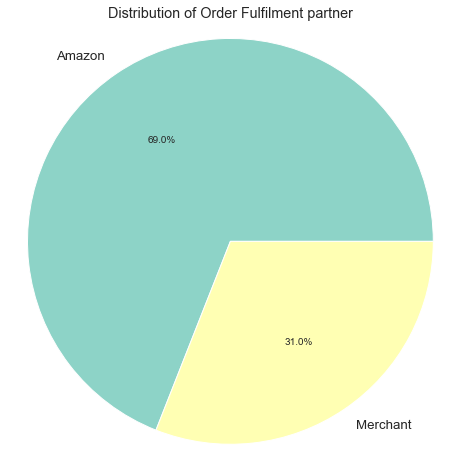

In [47]:
# Plotting the distribution of Order fulfilment partner on a pie chart.
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set3')

plt.pie(df['fulfilment'].value_counts(), labels=df['fulfilment'].value_counts().index, colors=colors, autopct='%1.1f%%')

plt.title('Distribution of Order Fulfilment partner')
plt.axis('equal')
plt.show()

> __Order fulfilment is done mostly by two sources, either by Amazon themselve or via Merchant. However, Amazon fulfills more than two-thirdth of the orders.__

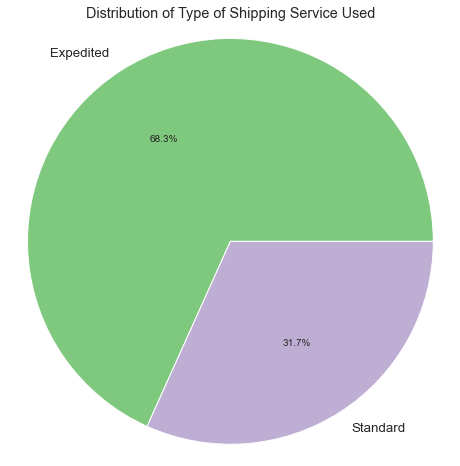

In [48]:
# plotting the distribution of Type of Shipping Service Used on a pie chart.
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Accent')

plt.pie(df['ship_service_level'].value_counts(), labels=df['ship_service_level'].value_counts().index, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Type of Shipping Service Used')
plt.axis('equal')
plt.show()

> __Customers prefer Expedited Shipping Service twice more than that of Standard Shipping Service.__

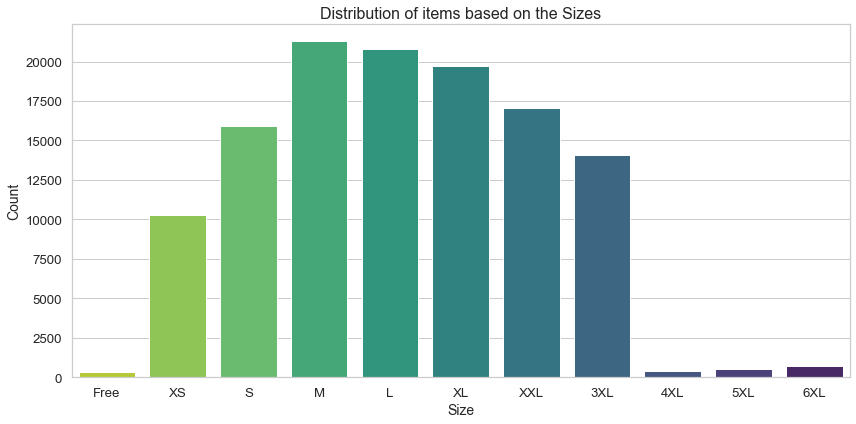

In [49]:
# plotting the distribution of Items based on their sizes.
plt.figure(figsize=(12, 6))

# Define the desired order for the 'size' categories
size_order = ['Free', 'XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

sns.countplot(x='size', data=df, order=size_order, palette="viridis_r")

plt.xlabel("Size", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of items based on the Sizes", fontsize=16)
plt.tight_layout()
plt.show()

>* __Most preferable size choice is Medium, followed by Large and Xtra-Large.__
>* __Free Style size , 4_Xtra-large, 5_Xtra-large, and 6_Xtra-large sizes are least ordered.__
>* __Rest of the sizes are moderately prefered.__

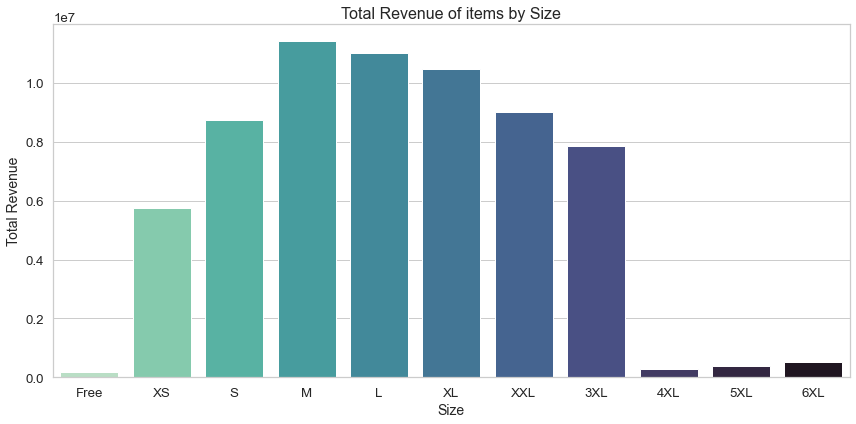

In [50]:
# plotting revenue generated by an items based on their sizes.
plt.figure(figsize=(12, 6))

# Define the desired order for the 'size' categories
size_order = ['Free', 'XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

# Group the data by 'size' and calculate the total amount for each size
total_amount_by_size = df.groupby('size')['total_price'].sum().reset_index()

sns.barplot(x='size', y='total_price', data=total_amount_by_size, order=size_order, palette="mako_r")

plt.xlabel("Size", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)
plt.title("Total Revenue of items by Size", fontsize=16)
plt.tight_layout()
plt.show()

> __Revenue generated from different sizes of clothing corresponds to quantity ordered of different sizes.__ 

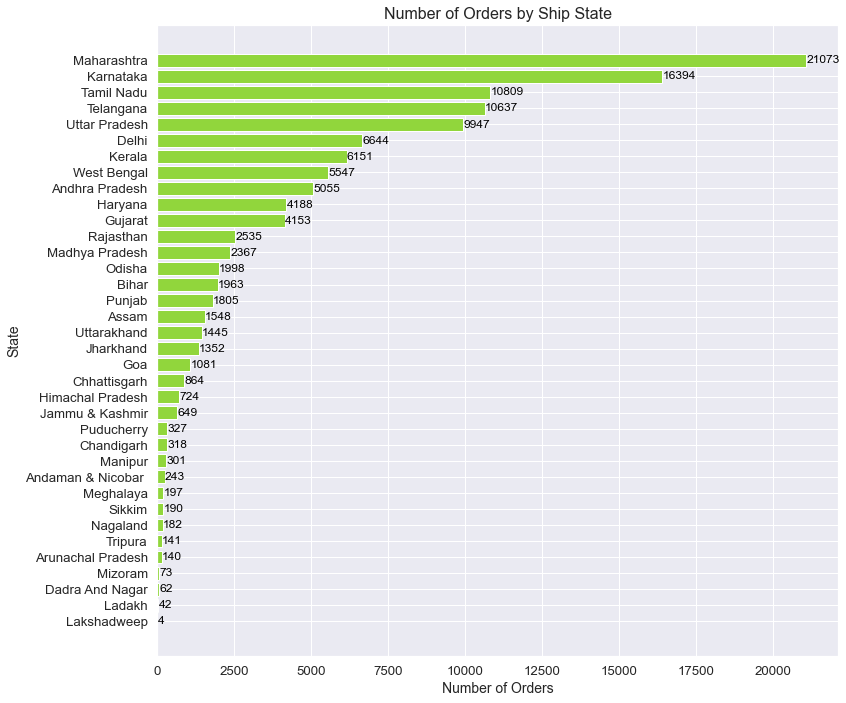

In [51]:
# plotting demand for item in various states.
sns.set(style="darkgrid", font_scale=1.2)
state_counts = df['ship_state'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(state_counts.index, state_counts.values, color='#91D63C')
plt.gca().invert_yaxis()
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Number of Orders by Ship State', fontsize=16)

# Display the count values on the bars
for i, v in enumerate(state_counts.values):
    plt.text(v + 10, i, str(v), color='black', fontsize=12, va='center', ha='left')

plt.tight_layout()
plt.show()

>* __Maharashtra and Karnataka are top two states where heavy demand for the clothing comes from.__
>* __Following top two states are Tamil Nadu, Telangana and Uttar Pradesh where most of the orders come from.__
>* __North-Eastern states, Union Territories and islands of Lakshadweep, Andaman & Nicobar has least demand for clothings.__

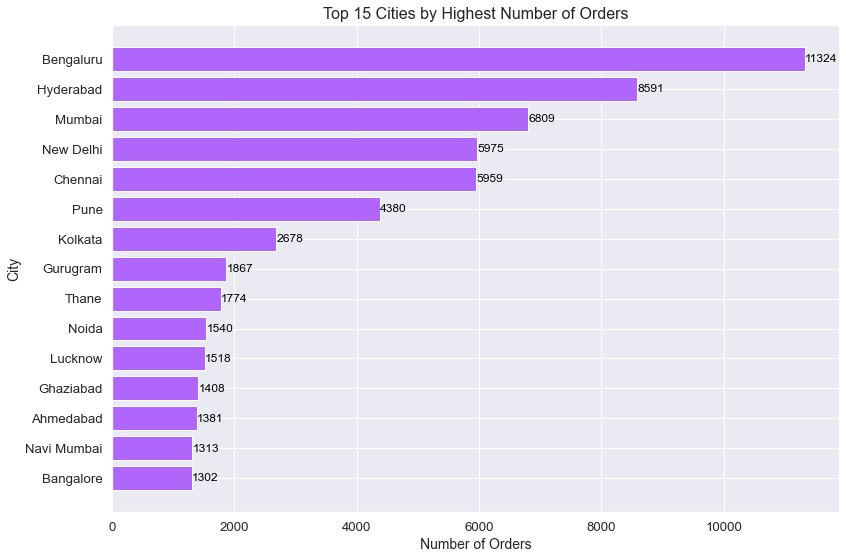

In [52]:
# plotting demand for item in top 15 cities.
city_counts = df['ship_city'].value_counts().sort_values(ascending=False)[:15]

# Create the chart
plt.figure(figsize=(12, 8))
plt.barh(city_counts.index, city_counts.values, color='#B066FA')

plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.title('Top 15 Cities by Highest Number of Orders', fontsize=16)

for i, v in enumerate(city_counts.values):
    plt.text(v + 5, i, str(v), color='black', fontsize=12, va='center', ha='left')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

> * __Bengaluru and Hyderabad outranks Mumbai in terms of demand.__
> * __Most of distribution of demand seems to be concentrated in Capital cities.__

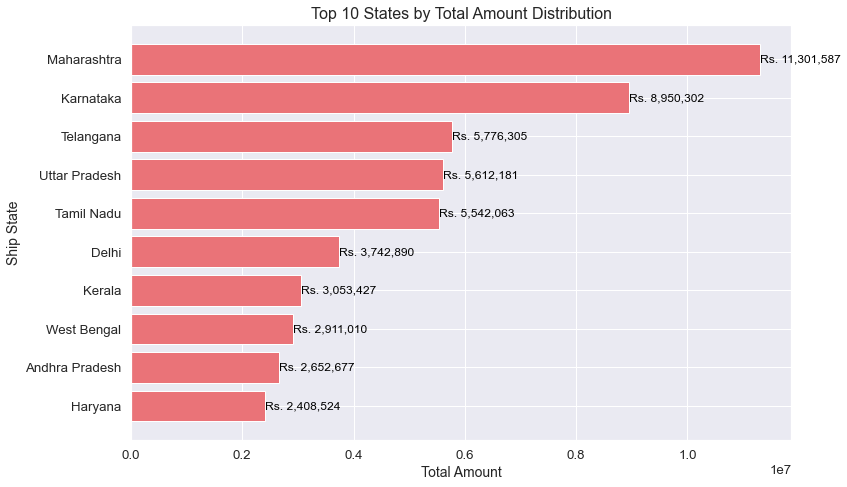

In [53]:
# plotting revenue generated by top 10 states.
state_amounts = df.groupby(['ship_state'])['total_price'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 7))
plt.barh(state_amounts.index, state_amounts.values, color='#EA7378')

plt.xlabel('Total Amount', fontsize=14)
plt.ylabel('Ship State', fontsize=14)
plt.title('Top 10 States by Total Amount Distribution', fontsize=16)

for i, v in enumerate(state_amounts.values):
    plt.text(v + 10, i, f"Rs. {v:,.0f}", color='black', fontsize=12, va='center', ha='left')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

>* __70% of the Revenue is generated from the top 10 states.__
>* __Among those top 10 Maharashtra and Karnataka themselves combined contribute to 30% Revenue.__
>* __Telangana, Uttar Pradesh, and Tamil Nadu have equal standing of 8% in terms of contributing to revenue.__

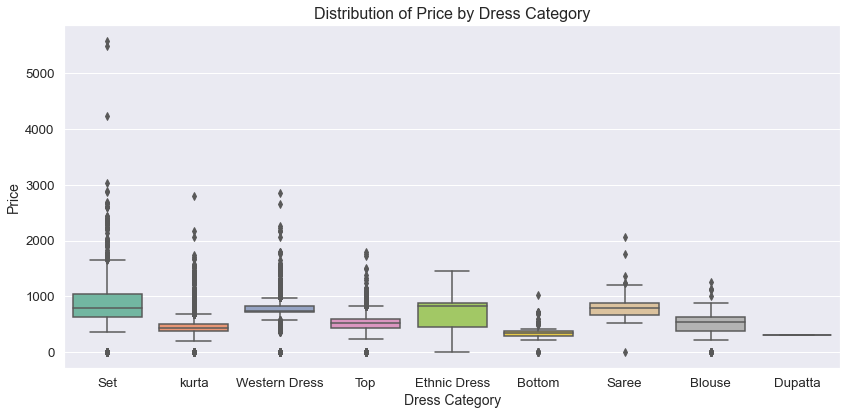

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amount', data=df, palette='Set2')

plt.xlabel("Dress Category", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Distribution of Price by Dress Category", fontsize=16)
plt.tight_layout()
plt.show()

> * __Set and Ethnic dress have very wide range of pricing.__
> * __Some of the clothings in Set Category are priced very high.__
> * __Bottom and Kurta fall in the lowest price band.__

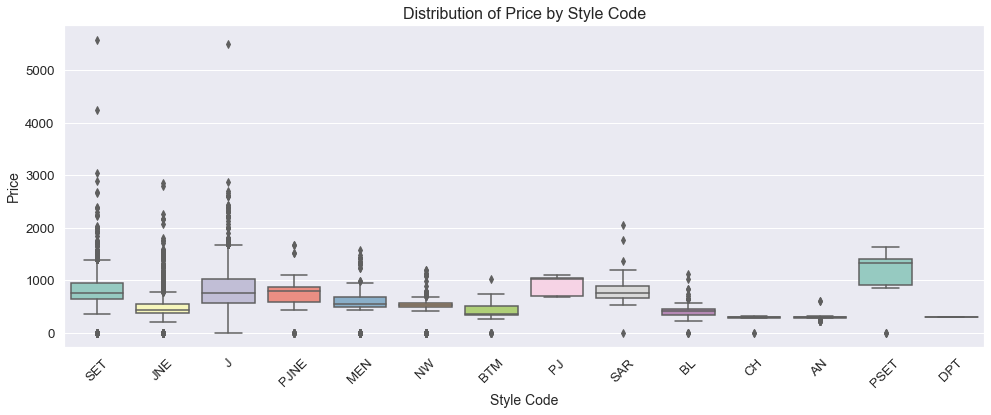

In [55]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='style_code', y='amount', data=df, palette="Set3")

plt.xlabel("Style Code", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Price", fontsize=14)
plt.title("Distribution of Price by Style Code", fontsize=16)
plt.tight_layout()
plt.show()

> * __Items with style code 'J' have very wide price range, whereas items with style code 'CH' and 'AN' are mostly priced around Rs.400__
> * __Items with style code 'PSET' are priced at premium price of over RS.800__

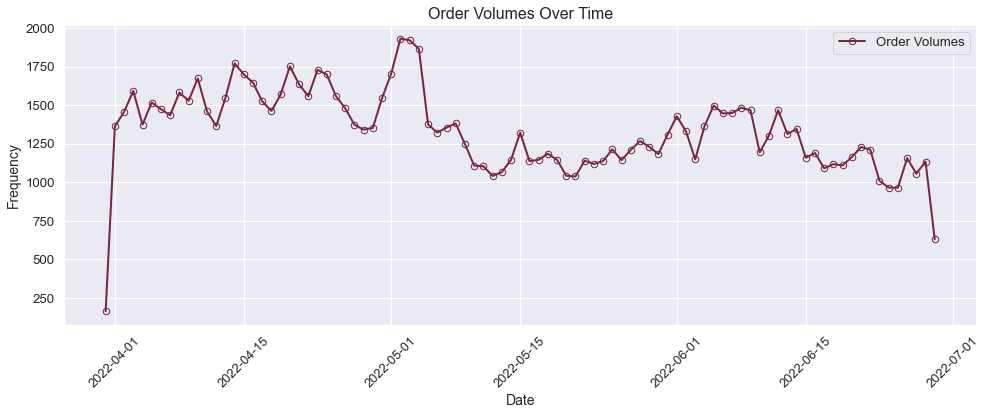

In [56]:
date_counts = df['date'].value_counts().sort_index()
plt.figure(figsize=(14, 6))

plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-', linewidth=2, 
         color='#782743', label='Order Volumes', markerfacecolor='none', markersize=6.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Order Volumes Over Time', fontsize=16)
plt.xticks(rotation=45, fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

> * __There was a surge in demand from last week of April to first week of May.__
> * __From 5th May there was sudden fall in demand up until 12th of May and then demand started steadily increasing for about a month.__
> * __From second week of June there was again a steady decline in demand.__